In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
x_train,x_test = x_train/255.0,x_test/255.0

In [40]:
print("X_train.shape:",x_train.shape)
print("Y_train.shape:",y_train.shape)
print(x_test.shape)
print(y_test.shape)

X_train.shape: (60000, 28, 28)
Y_train.shape: (60000,)
(10000, 28, 28)
(10000,)


In [0]:
#Build the Model( NN with two layers (Relu and softmax))

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape =(28,28)),#convert the input into 2 dimensional array = N(60000) * 784
                                    tf.keras.layers.Dense(128,activation='relu'),#hyperparamenter 128 experimental
                                    tf.keras.layers.Dropout(0.2),# Drop the neurons by 20 percent in the layer randomly
                                    tf.keras.layers.Dense(10,activation='softmax')# total output classes are 10 and softmax function is for multiclass classification


])

In [0]:
#compile the model

model.compile(optimizer='adam', #adam for calculating Gradient descent
              loss = 'sparse_categorical_crossentropy',# loss function for multiclass classification 
              metrics = ['accuracy'])# metric used is accuracy in case of classification(comparing probabilities between actual and predicted result like disease or no disease)

In [43]:
#Train the model

r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.9150 - val_loss: 0.1410 - val_accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - accuracy: 0.9584 - val_loss: 0.0972 - val_accuracy: 0.9716
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9675 - val_loss: 0.0894 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9732 - val_loss: 0.0779 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0747 - accuracy: 0.9765 - val_loss: 0.0780 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.0749 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0604 - accuracy: 0.9807 - val_loss: 0.0699 - val_accuracy:

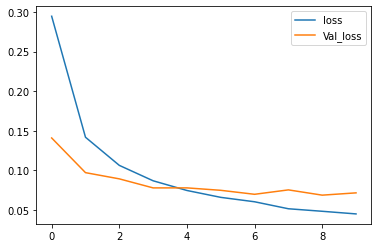

In [44]:
#Visualizing loss per iteration
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label = 'Val_loss')
plt.legend()

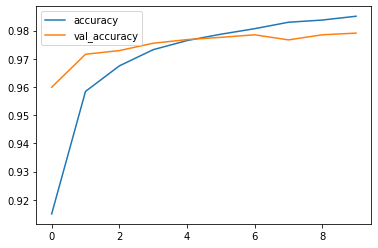

In [45]:
#visualizing accuracy per iteration
plt.plot(r.history['accuracy'],label = 'accuracy')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

In [46]:
#Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9791
[0.07167381048202515, 0.9790999889373779]
